In [ ]:
# instalando dependencias - pandas / matplotlib / sklearn / skforecast
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.6/560.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Carregando dados
# Volume de vendas
url = 'https://raw.githubusercontent.com/Aldrik-Alvaro/Algoritimo-Serie-Temporal/main/datasets/sales/sales.csv'
data = pd.read_csv(url, sep=',')
data.head(5)

,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123


In [ ]:
# Tratamento de dados

#dropa colunas não usaveis
data = data.drop(columns=['Unnamed: 0'])

# Renomeia a coluna de data
data = data.rename(columns={'Date': 'date'})
data = data.rename(columns={'Sales': 'sales'})
data.head(5)

,date,sales
0,2021-10-01,29.109547
1,2021-10-02,30.720435
2,2021-10-03,30.305173
3,2021-10-04,27.390893
4,2021-10-05,22.841123


In [ ]:
# Converte data de string para datetime e transforma em índice
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.head(5)

,date,sales
0,2021-10-01,29.109547
1,2021-10-02,30.720435
2,2021-10-03,30.305173
3,2021-10-04,27.390893
4,2021-10-05,22.841123


In [ ]:
# Seto o índice
data = data.set_index('date')
data.head(5)

,sales
date,
2021-10-01,29.109547
2021-10-02,30.720435
2021-10-03,30.305173
2021-10-04,27.390893
2021-10-05,22.841123


In [ ]:
#Defino a frequência
data = data.asfreq('D', fill_value=0.0)

In [ ]:
# Ordena pela data
data = data.sort_index()
data.head(5)

,sales
date,
2021-10-01,29.109547
2021-10-02,30.720435
2021-10-03,30.305173
2021-10-04,27.390893
2021-10-05,22.841123


In [ ]:
# Filtrar o DataFrame
#start_date = pd.Timestamp('2020-01-01 00:00:00')
#filtered_data  = data.loc[start_date:]
#filtered_data.head(5)

,value
date,
2020-01-01 00:00:00,0.0
2020-01-01 01:00:00,0.0
2020-01-01 02:00:00,0.0
2020-01-01 03:00:00,0.0
2020-01-01 04:00:00,0.0


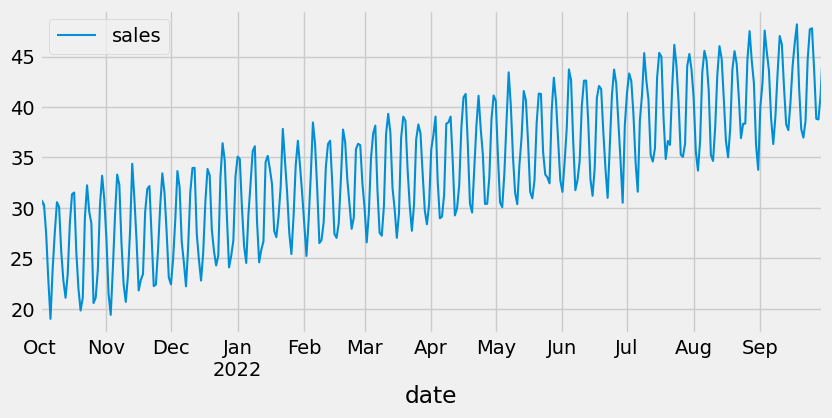

In [ ]:
# Plota os dados
fig, ax = plt.subplots(figsize=(9, 4))
data['sales'].plot(ax=ax, label='sales')
ax.legend();

In [ ]:
#print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


Train dates : 2021-10-01 00:00:00 --- 2022-08-01 00:00:00  (n=305)
Test dates  : 2022-08-02 00:00:00 --- 2022-09-30 00:00:00  (n=60)


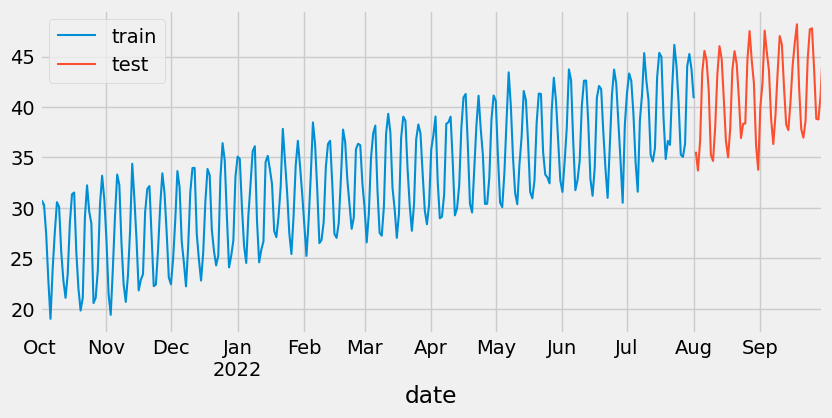

In [ ]:
# Divide dados em treinamento e teste
# Para séries temporais, sempre utilizamos os dados mais recentes para teste
steps = 60
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4))
data_train['sales'].plot(ax=ax, label='train')
data_test['sales'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
# Configura e treina um RandomForestRegressor para série temporal
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123),
                lags      = 12
             )

forecaster.fit(y=data_train['sales'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2021-10-01 00:00:00'), Timestamp('2022-08-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-05-22 00:31:47 
Last fit date: 2024-05-22 00

In [ ]:
# Faz predição no conjunto de teste
steps = 60
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2022-08-02    35.577522
2022-08-03    35.876199
2022-08-04    36.568725
2022-08-05    43.478838
2022-08-06    45.374327
Freq: D, Name: pred, dtype: float64

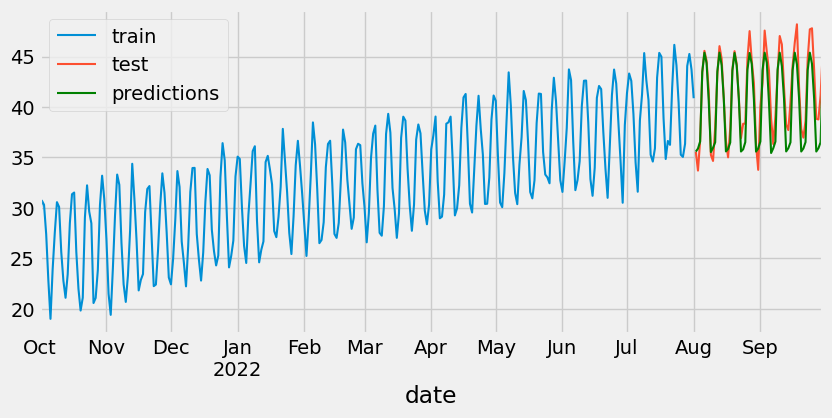

In [ ]:
# Plota a predição, comparando com valores reais
fig, ax=plt.subplots(figsize=(9, 4))
data_train['sales'].plot(ax=ax, label='train')
data_test['sales'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions', color='green')
ax.legend();